In [19]:
import torch
import torch.nn as nn
from torchsummary import summary
import torch.optim as optim
from torchvision import datasets, transforms


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0), (255))])
train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_ds = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [20]:
# write  your custom metrics
def acc(pred, y):
    pred = torch.argmax(pred, dim=1)
    return torch.sum(pred == y)

In [ ]:
from trainier import Trainer
# from callbacks import EarlyStoping

model = nn.Sequential(nn.Flatten(), nn.Linear(28*28, 128), nn.GELU(), nn.Linear(128, 10))
loss = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.005, weight_decay=0.0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=.9)

In [21]:
learner = Trainer(model=model, train_ds=train_ds, valid_ds=test_ds, optimizer=optimizer, loss=loss, metrcis=[acc])
learner.summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              GELU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------



 Epoch  1/ 1
---------------------------------------------------------------------------
 train_steps: 1864/1875   loss: 1.8641  acc: 13.053  time: 0m 27s




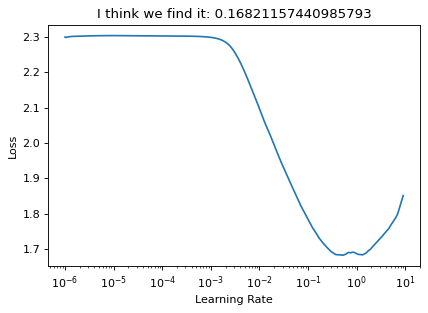

In [22]:
learner.lr_finder(device='cpu', epochs=1)

In [23]:
learner.set_lr(3e-2)
learner.fit(2, device='cpu')


 Epoch  1/ 2
---------------------------------------------------------------------------
 train_steps: 1875/1875   loss: 0.4163  acc: 27.841  time: 0m 27s
 valid_steps: 157/157   loss: 0.2321  acc: 59.045

 Epoch  2/ 2
---------------------------------------------------------------------------
 train_steps: 1875/1875   loss: 0.2082  acc: 29.999  time: 0m 27s
 valid_steps: 157/157   loss: 0.1724  acc: 60.229
